In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
crime12 = pd.read_csv('./Downloads/crime_data/crime/42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [3]:
crime13 = pd.read_csv('./Downloads/crime_data/crime/42_District_wise_crimes_committed_against_women_2013.csv')

In [4]:
crime12.columns = crime12.columns.str.upper()

In [5]:
crime13.columns = crime13.columns.str.upper()
crime13['STATE/UT'] = crime13['STATE/UT'].str.upper()
crime13['DISTRICT'].replace('ZZ TOTAL', 'TOTAL', inplace = True)

In [6]:
dataframe = pd.concat([crime12, crime13])

In [7]:
dataframe.head()

,STATE/UT,DISTRICT,YEAR,RAPE,KIDNAPPING AND ABDUCTION,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [8]:
dataframe.fillna(value = 0, inplace= True)

In [9]:
total_crime = dataframe[dataframe['DISTRICT'] == 'TOTAL']

In [10]:
punjab_crime = total_crime[total_crime['STATE/UT'] == 'PUNJAB']

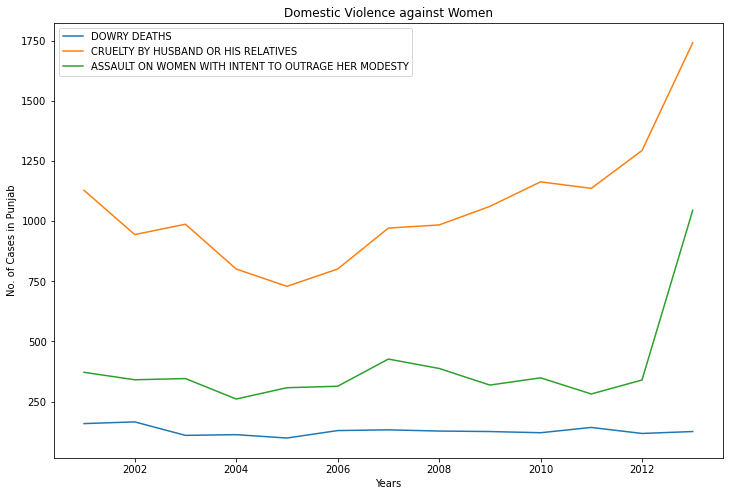

In [11]:
punjab_crime.set_index('YEAR')[['DOWRY DEATHS', 'CRUELTY BY HUSBAND OR HIS RELATIVES','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']].plot(kind = 'line', figsize = (12,8))
plt.xlabel('Years')
plt.ylabel('No. of Cases in Punjab')
plt.title('Domestic Violence against Women')
plt.show()

In [12]:
data24 = dataframe[(dataframe['DISTRICT'] == 'TOTAL') & (dataframe['YEAR'] == 2013)]

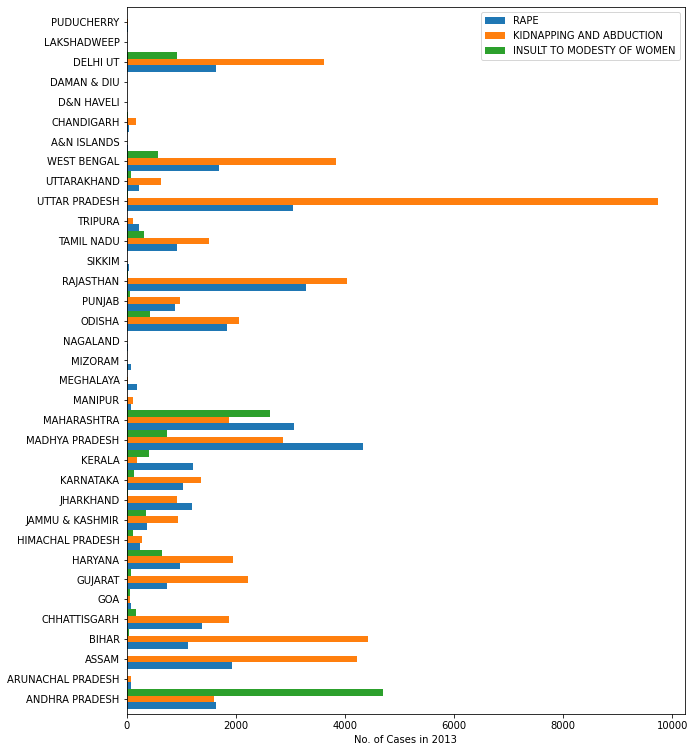

In [13]:
allstates24 = data24[['RAPE', 'KIDNAPPING AND ABDUCTION','INSULT TO MODESTY OF WOMEN']].plot(kind = 'barh', figsize = (10,13), width = 1)
allstates24.set_xlabel('No. of Cases in 2013')
allstates24.set_yticklabels(data24['STATE/UT'])
plt.show()

In [14]:
crimes = dataframe.groupby('STATE/UT').sum()

In [15]:
crimes.drop('YEAR', axis= 1, inplace= True)

In [16]:
crimes['TOTAL'] = 0

In [17]:
for i in range(len(crimes.index)):
    crimes['TOTAL'][i] = crimes.iloc[i].sum()

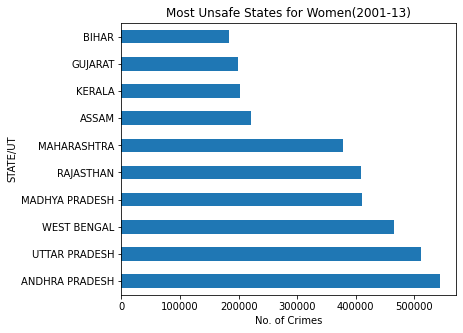

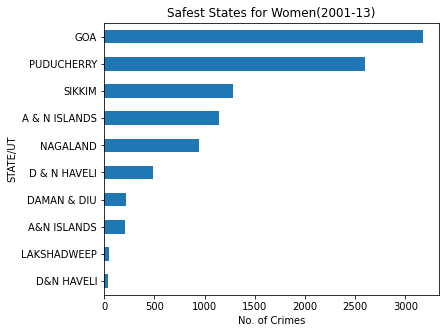

In [18]:
max_crimes = crimes['TOTAL'].nlargest(10).plot(kind = 'barh', title = 'Most Unsafe States for Women(2001-13)', figsize = (6,5))
plt.xlabel('No. of Crimes')
plt.show()
min_crimes = crimes['TOTAL'].nsmallest(10).plot(kind = 'barh', title = 'Safest States for Women(2001-13)', figsize = (6,5))
plt.xlabel('No. of Crimes')
plt.show()

In [19]:
dataframe.head()

,STATE/UT,DISTRICT,YEAR,RAPE,KIDNAPPING AND ABDUCTION,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [45]:
def setHighCrime(df):
    '''Function to set value of highCrime depending on ViolentCrimesPerPop'''
    if df['DOWRY DEATHS'] > 7:
        return True
    else:
        return False
    
# Adding a new field "highCrime"
dataframe['highCrime'] = dataframe.apply(setHighCrime, axis=1)

# Calculating the percentage of positive and negative instances in the dataset
percentage_intances = dataframe.groupby('highCrime').size() * 100 / len(dataframe)
print(percentage_intances)
print("------------------")
print("Percentage Positive Instance = {}\nPercentage Negative Instance = {} ".format(percentage_intances[1],percentage_intances[0]))

highCrime
False    57.337398
True     42.662602
dtype: float64
------------------
Percentage Positive Instance = 42.66260162601626
Percentage Negative Instance = 57.33739837398374 


In [46]:
X = dataframe.drop('RAPE', axis=1).drop('IMPORTATION OF GIRLS', axis=1).drop('INSULT TO MODESTY OF WOMEN', axis=1).drop('CRUELTY BY HUSBAND OR HIS RELATIVES', axis=1).drop('STATE/UT', axis=1).drop('DOWRY DEATHS', axis=1).drop('DISTRICT', axis=1).drop('ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', axis=1).drop('KIDNAPPING AND ABDUCTION', axis=1).drop('highCrime', axis=1)

y = dataframe["highCrime"]



In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .50,random_state = 10)

In [48]:
y_test

192     False
1636    False
4035    False
473     False
5154     True
        ...  
2266     True
3990     True
1241    False
2878    False
4489    False
Name: highCrime, Length: 4920, dtype: bool

In [49]:
testing = [x_test,y_test]

In [50]:
result = pd.concat(testing,axis = 1)

In [51]:

import seaborn as sns
sns.set()
result = result.set_index('YEAR')

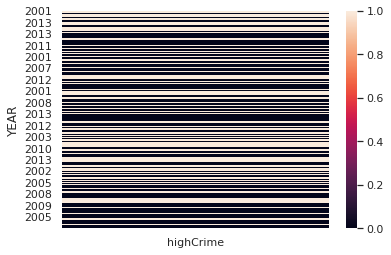

In [52]:
sns.heatmap(result)
plt.show()

In [39]:
print(result)

      highCrime
YEAR           
2001      False
2003      False
2006      False
2013      False
2008       True
...         ...
2004      False
2006       True
2002      False
2004      False
2007      False

[4920 rows x 1 columns]


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_curve, roc_curve, auc, log_loss
import numpy as np
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)
logreg_accy = round(accuracy_score(y_pred,y_test), 3)
print (logreg_accy)

0.904


In [44]:
print (classification_report(y_test, y_pred, labels=logreg.classes_))
print (confusion_matrix(y_pred, y_test))

             precision    recall  f1-score   support

      False       0.90      1.00      0.95      4449
       True       0.00      0.00      0.00       471

avg / total       0.82      0.90      0.86      4920

[[4449  471]
 [   0    0]]


/usr/lib/python3/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
